In [13]:
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt

In [33]:
from skimage import data

photo_data = np.asarray(data.imread('./wifire/sd-3layers.jpg'))

type(photo_data)

numpy.ndarray

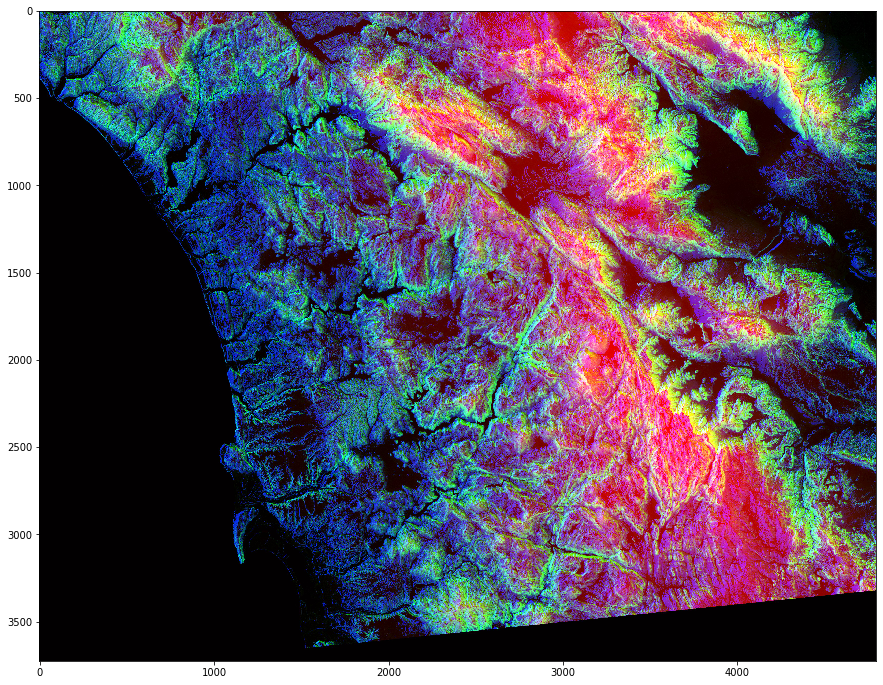

In [34]:
plt.figure(figsize = (15, 15))
plt.imshow(photo_data)

In [35]:
photo_data.shape

(3725, 4797, 3)

In [36]:
photo_data[200:800,:,0] = 255 

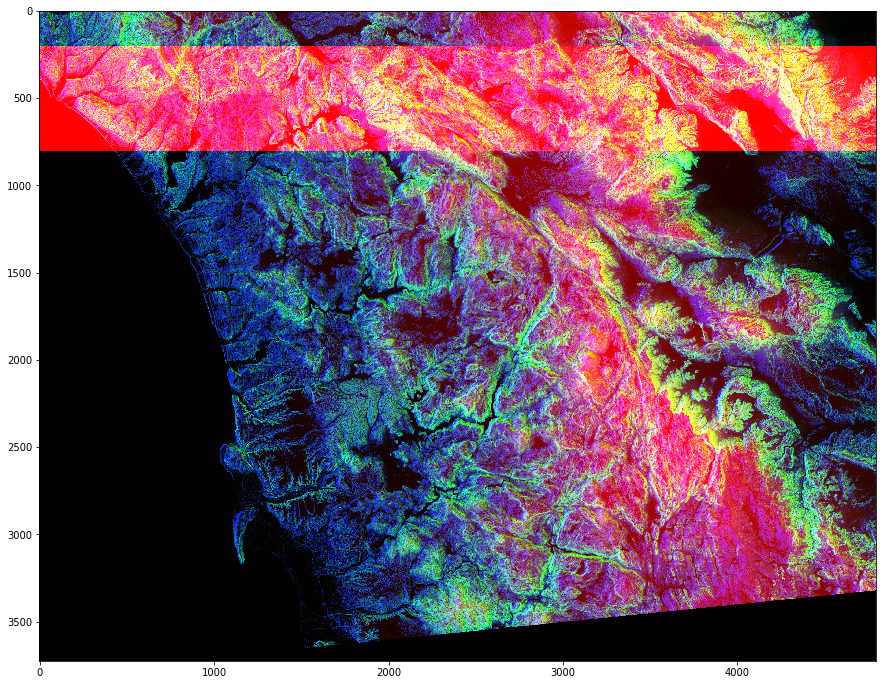

In [37]:
plt.figure(figsize=(15,15))
plt.imshow(photo_data)

In [451]:
photo_data = np.asarray(data.imread('./wifire/sd-3layers.jpg'))

low_value_filter = photo_data < 200


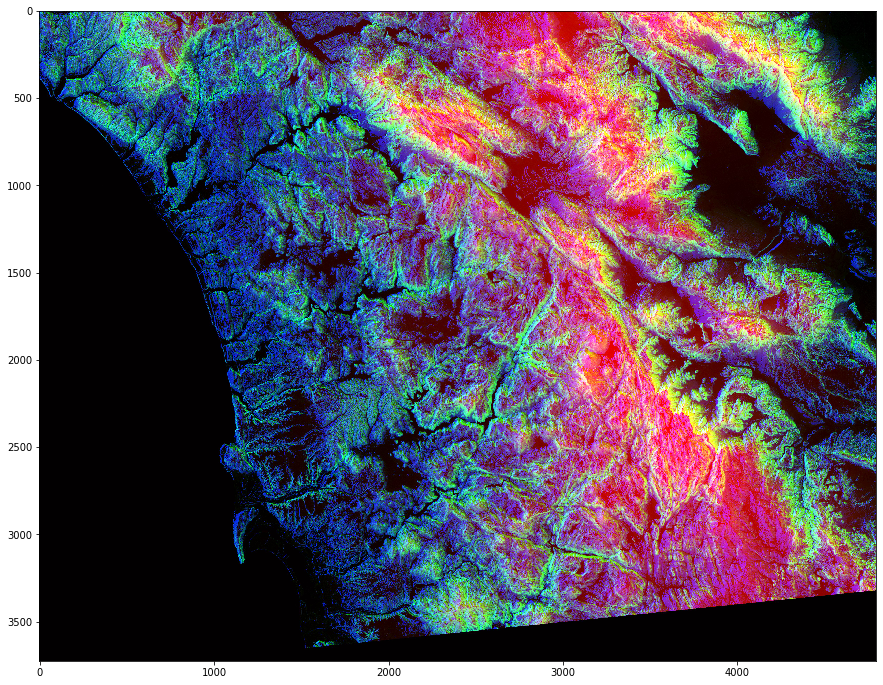

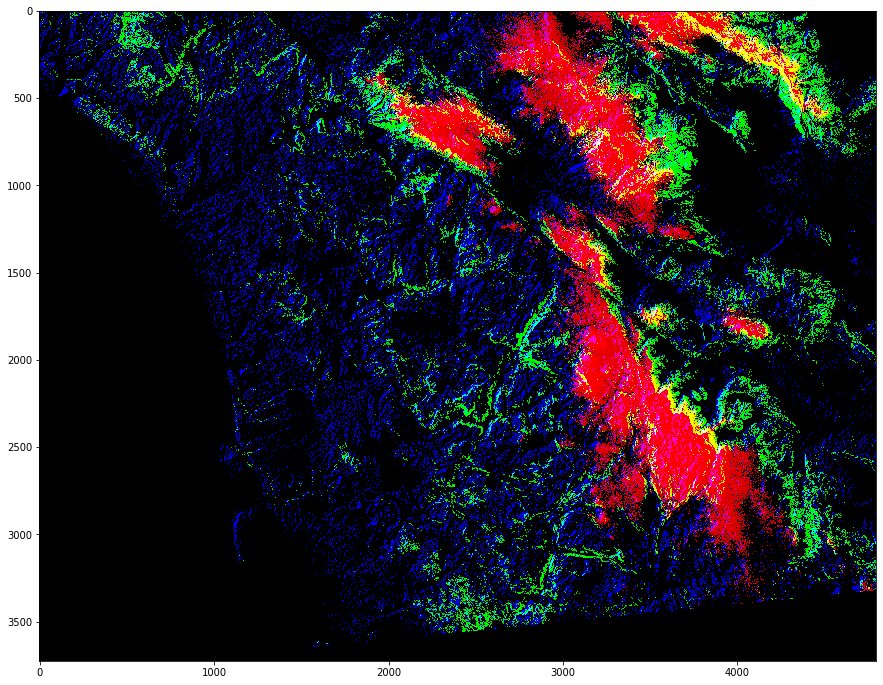

In [452]:
plt.figure(figsize = (15, 15))
plt.imshow(photo_data)

filtered_data = np.array(photo_data)

# filtered image
plt.figure(figsize = (15, 15))
filtered_data[low_value_filter] = 0
plt.imshow(filtered_data)

In [454]:
import math 

x, y, z = filtered_data.shape

max_diagonal_point = int((x**2 + y**2)**.5)

print(x, y, z)

cos_alpha = (x*y)/((x**2 + y**2)**.5*(x**2)**.5)

alpha = np.arccos(cos_alpha)

#print(np.sin(alpha)*max_diagonal_point)

diagnal = np.zeros((max_diagonal_point, 2), dtype = int)

for i in np.arange(max_diagonal_point):
    diagnal[i] = [math.ceil(np.cos(alpha) * i), math.ceil(np.sin(alpha) * i)]

3725 4797 3


In [455]:
# print(diagnal[-100:-1,])
# print(len(np.unique(diagnal[:,1])))
row_cells = np.arange(len(filtered_data))

print(len(diagnal))
print(np.setdiff1d(np.arange(filtered_data.shape[1]), diagnal[:,0]))
print(diagnal[:,1])
print()

6073
[]
[   0    1    2 ... 3723 3724 3725]



In [456]:
filtered_data[diagnal[:-1,1],diagnal[:-1,0]] = 255

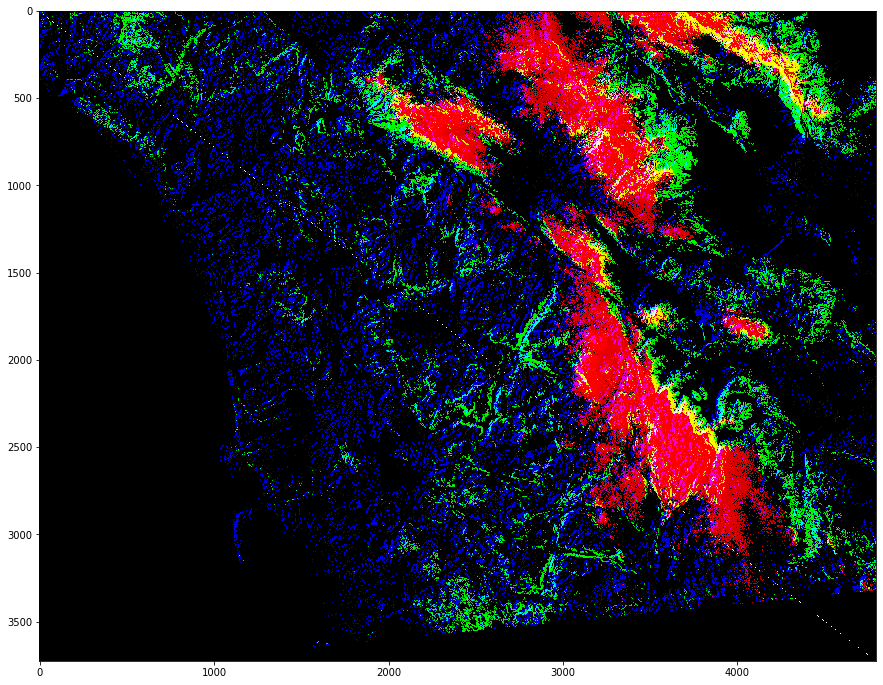

In [457]:
plt.figure(figsize = (15,15))
plt.imshow(filtered_data)

## Convert colored image to grayscale by resetting the average of rgb

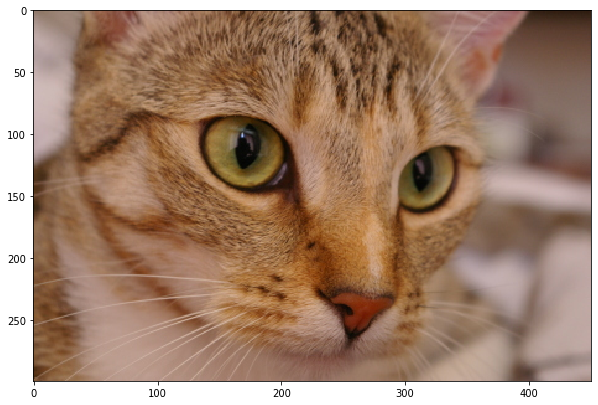

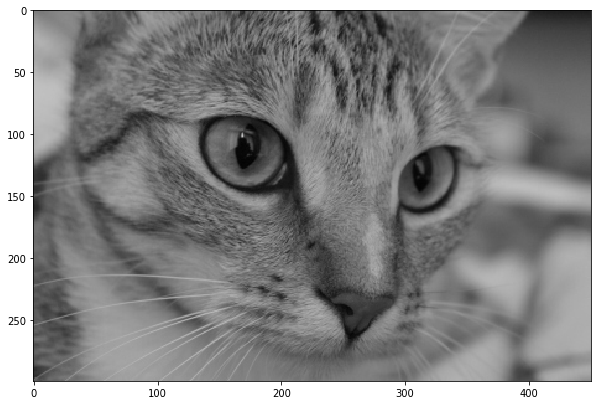

In [475]:
chelsea = data.chelsea()

total_row, total_col = chelsea.shape[:2]

new_arr = chelsea.mean(axis = 2, dtype = int)

gray_arr = np.zeros(chelsea.shape, dtype = int)

gray_arr = gray_arr + new_arr.reshape(total_row, total_col, 1) 

gray_arr[gray_arr > 255] = 255
gray_arr[gray_arr < 0] = 0

plt.figure(figsize=(10,10))
plt.imshow(chelsea)

plt.figure(figsize=(10,10))
plt.imshow(gray_arr)

In [509]:
import random

def CircleImage(image, color):
    circled_img = np.array(image)

    total_row, total_col = circled_img.shape[:2]

    X, Y = np.ogrid[:total_row, :total_col]

    center_row, center_col = total_row / 2, total_col / 2

    dist_from_center = (X - center_row)**2 + (Y - center_col)**2

    radius = center_row**2

#     print(center_row, center_col)
    circled_mask = dist_from_center > radius

    circled_img[circled_mask] = color

    return circled_img

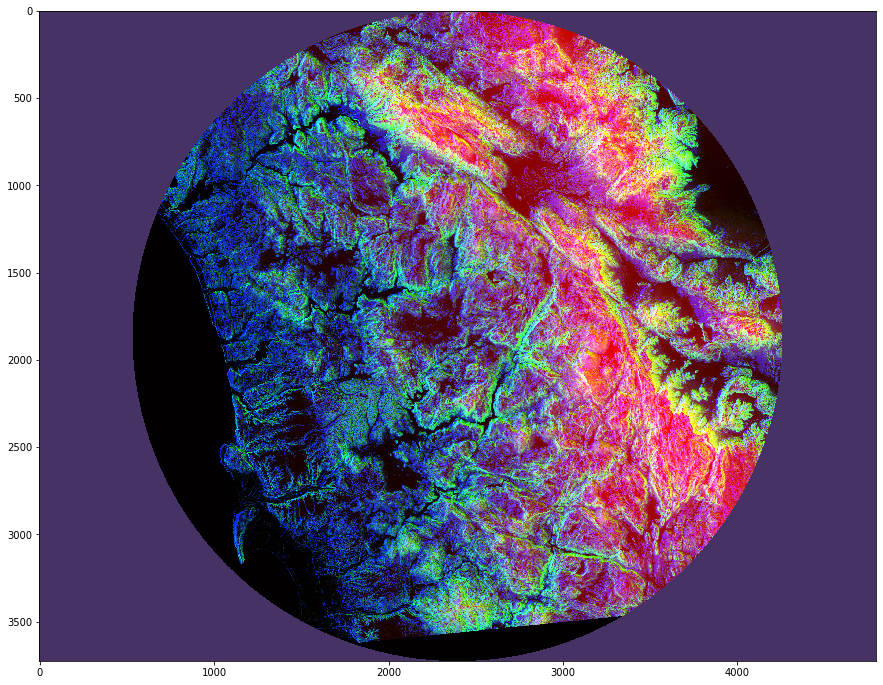

In [510]:
plt.figure(figsize=(15,15))
plt.imshow(CircleImage(photo_data, (70, 50, 100)))

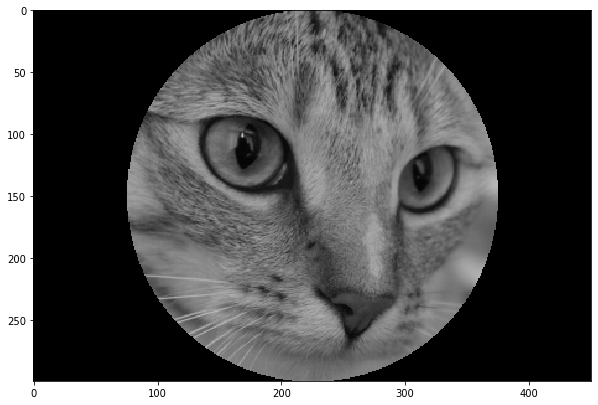

In [519]:
plt.figure(figsize=(10,10))
plt.imshow(CircleImage(gray_arr, 0))

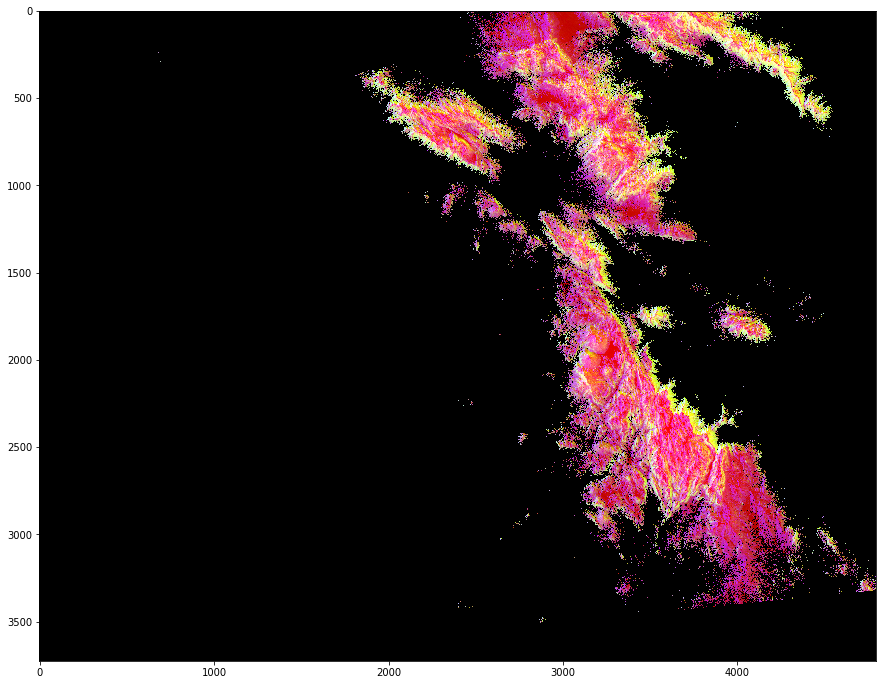

In [552]:
red_photo = np.array(photo_data)
red_mask = red_photo[:,:, 0] < 180

# print(red_mask)
red_photo[red_mask] = 0
plt.figure(figsize=(15,15))
plt.imshow(red_photo)